In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../data/cleaned_train_car_data.csv")

In [3]:
train_df, val_df = train_test_split(data, test_size=0.2,random_state=42)

In [4]:
train_df = train_df.set_index('Index')
val_df = val_df.set_index('Index')

In [5]:
train_df.head()

brand  milage fuel_type transmission ext_col int_col       accident  \
Index                                                                          
3151     Tesla   10550       NaN    Automatic    Grey   Black  None reported   
805        BMW  114890  Gasoline      Unknown   White   Other  None reported   
3824   Porsche   56985  Gasoline    Automatic    Blue    Grey  None reported   
2681       RAM  124700  Gasoline    Automatic  Silver   Other  None reported   
497      Volvo   22500  Gasoline    Automatic   Black   White  None reported   

      clean_title  price  car_age  horsepower  engine_size  cylinder_count  
Index                                                                       
3151          Yes  67800        3       557.0          NaN             NaN  
805           Yes  20990       13       414.0          4.0             8.0  
3824          Yes  65900       11       400.0          3.8             6.0  
2681          Yes  30000       10       410.0          6.4             8.0  
497           Yes  50000        4       316.0          2.0             4.0

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2565 entries, 3151 to 459
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           2565 non-null   object 
 1   milage          2565 non-null   int64  
 2   fuel_type       2468 non-null   object 
 3   transmission    2565 non-null   object 
 4   ext_col         2565 non-null   object 
 5   int_col         2565 non-null   object 
 6   accident        2488 non-null   object 
 7   clean_title     2182 non-null   object 
 8   price           2565 non-null   int64  
 9   car_age         2565 non-null   int64  
 10  horsepower      2043 non-null   float64
 11  engine_size     2333 non-null   float64
 12  cylinder_count  1967 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 280.5+ KB


In [7]:
train_df.describe()

milage          price     car_age   horsepower  engine_size  \
count    2565.000000    2565.000000  2565.00000  2043.000000  2333.000000   
mean    64538.663158   43793.202729     8.45770   334.986784     3.713716   
std     51697.955542   53742.647417     6.07701   122.983175     1.414566   
min       100.000000    2300.000000     0.00000    70.000000     0.650000   
25%     23777.000000   17500.000000     4.00000   250.000000     2.500000   
50%     53433.000000   31650.000000     7.00000   315.000000     3.500000   
75%     93000.000000   50000.000000    12.00000   402.000000     4.700000   
max    405000.000000  749950.000000    50.00000  1020.000000     8.300000   

       cylinder_count  
count     1967.000000  
mean         6.264870  
std          1.640194  
min          3.000000  
25%          6.000000  
50%          6.000000  
75%          8.000000  
max         12.000000

## Handling Missing Values

In [8]:
percent_missing = 100*train_df.isna().sum()/len(train_df)
percent_missing[percent_missing>0]

fuel_type          3.781676
accident           3.001949
clean_title       14.931774
horsepower        20.350877
engine_size        9.044834
cylinder_count    23.313840
dtype: float64

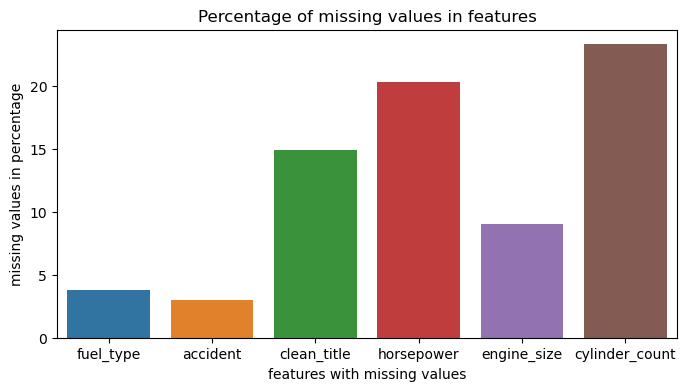

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(x=percent_missing[percent_missing>0].index,y=percent_missing[percent_missing>0])
plt.xlabel("features with missing values")
plt.ylabel("missing values in percentage")
plt.title("Percentage of missing values in features")
plt.show()

In [10]:
train_df['fuel_type'] = train_df['fuel_type'].fillna("Unknown")

In [11]:
train_df['accident'] = train_df['accident'].fillna("Unknown")

In [12]:
train_df['clean_title'] = train_df['clean_title'].fillna("Unknown")

<Axes: xlabel='horsepower', ylabel='Count'>

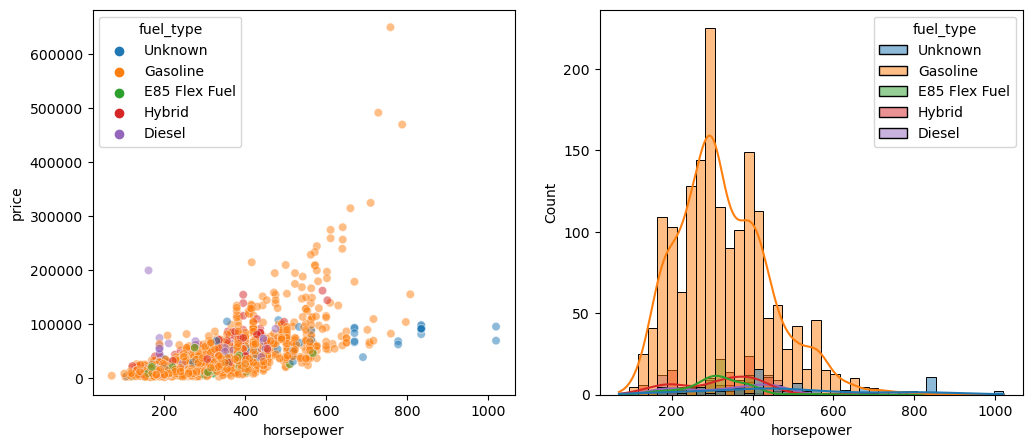

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(x='horsepower',y='price',data=train_df,hue='fuel_type',alpha=0.5,ax=axes[0])
sns.histplot(x='horsepower',data=train_df,kde=True,hue='fuel_type',ax=axes[1])

<Axes: xlabel='engine_size', ylabel='Count'>

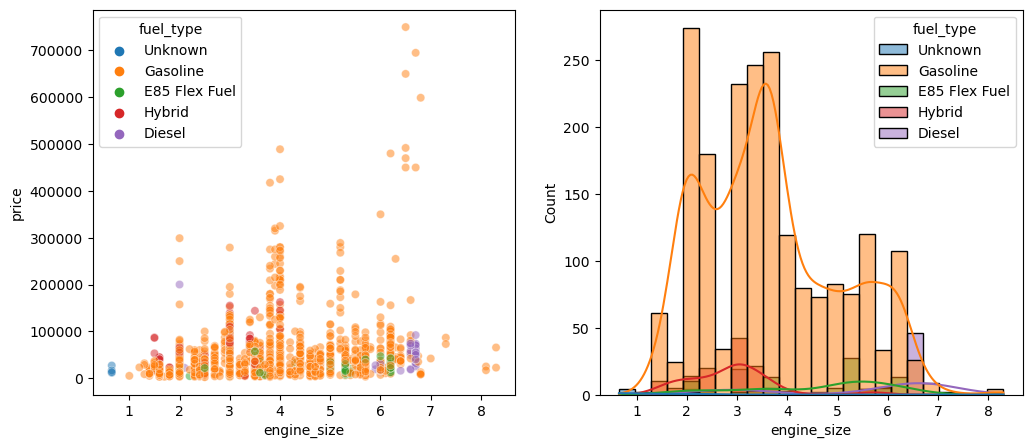

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(x='engine_size',y='price',data=train_df,hue='fuel_type',alpha=0.5,ax=axes[0])
sns.histplot(x='engine_size',data=train_df,kde=True,hue='fuel_type',ax=axes[1])

<Axes: xlabel='cylinder_count', ylabel='price'>

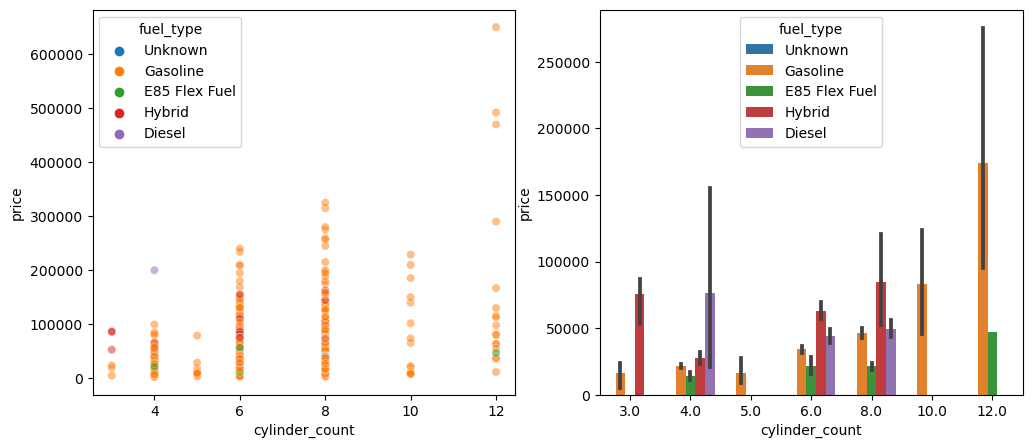

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(x='cylinder_count',y='price',data=train_df,hue='fuel_type',alpha=0.5,ax=axes[0])
sns.barplot(x='cylinder_count',y='price',data=train_df,hue='fuel_type',ax=axes[1])

In [16]:
train_df.groupby('fuel_type').mean(numeric_only=True)

milage         price    car_age  horsepower  \
fuel_type                                                           
Diesel          85441.884615  49973.538462   7.666667  339.231884   
E85 Flex Fuel  105286.662921  21641.438202  10.247191  312.550000   
Gasoline        65569.916981  43163.377830   8.734434  329.469412   
Hybrid          36804.906667  53603.386667   4.113333  317.608696   
Unknown         38888.523438  54364.625000   8.203125  498.025316   

               engine_size  cylinder_count  
fuel_type                                   
Diesel            5.436000        6.885714  
E85 Flex Fuel     4.620455        7.075000  
Gasoline          3.671520        6.265570  
Hybrid            2.849194        5.313043  
Unknown           1.100000             NaN

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
impute_mean = SimpleImputer(missing_values=np.nan,strategy='mean')

In [19]:
impute_mean.fit(train_df[['horsepower','engine_size','cylinder_count']])

SimpleImputer()

In [20]:
train_df[['horsepower','engine_size','cylinder_count']] = impute_mean.transform(train_df[['horsepower','engine_size','cylinder_count']])

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2565 entries, 3151 to 459
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           2565 non-null   object 
 1   milage          2565 non-null   int64  
 2   fuel_type       2565 non-null   object 
 3   transmission    2565 non-null   object 
 4   ext_col         2565 non-null   object 
 5   int_col         2565 non-null   object 
 6   accident        2565 non-null   object 
 7   clean_title     2565 non-null   object 
 8   price           2565 non-null   int64  
 9   car_age         2565 non-null   int64  
 10  horsepower      2565 non-null   float64
 11  engine_size     2565 non-null   float64
 12  cylinder_count  2565 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 280.5+ KB


## Dealing With outliers

C:\Users\THINKPAD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


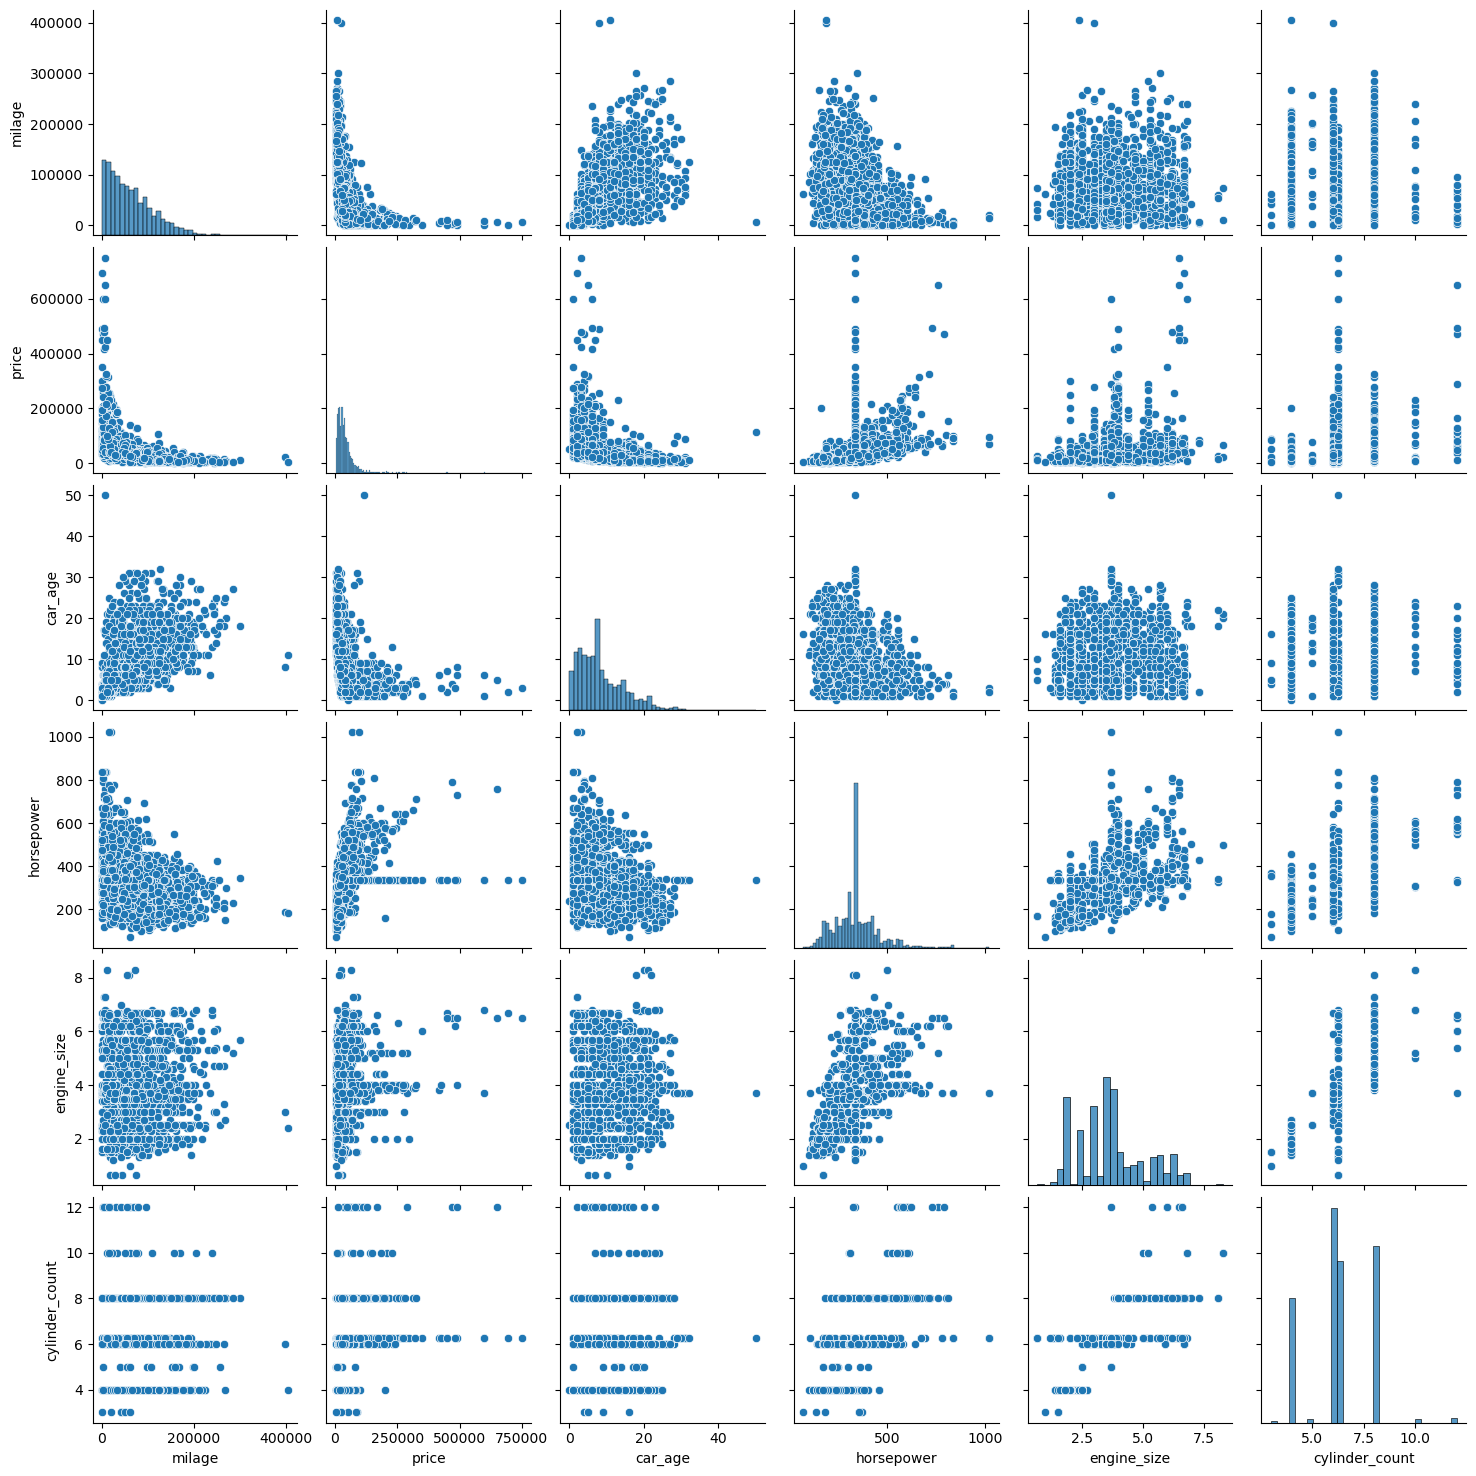

In [22]:
sns.pairplot(train_df)

<Axes: xlabel='price'>

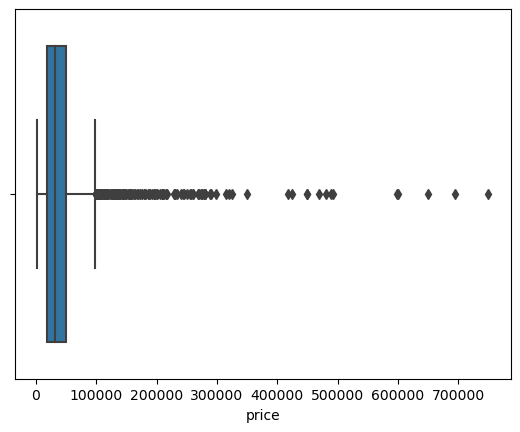

In [34]:
sns.boxplot(x='price',data=train_df)

In [35]:
from sklearn.preprocessing import FunctionTransformer

In [36]:
log_transformer = FunctionTransformer(np.log1p,inverse_func=np.expm1)

In [37]:
train_df['price'] = log_transformer.transform(train_df['price'])

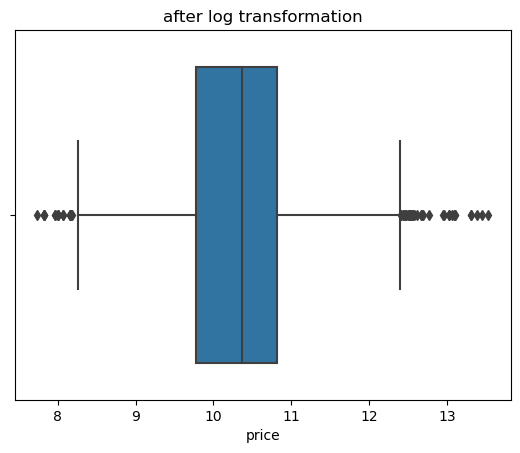

In [39]:
sns.boxplot(x='price',data=train_df)
plt.title('after log transformation')
plt.show()

C:\Users\THINKPAD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


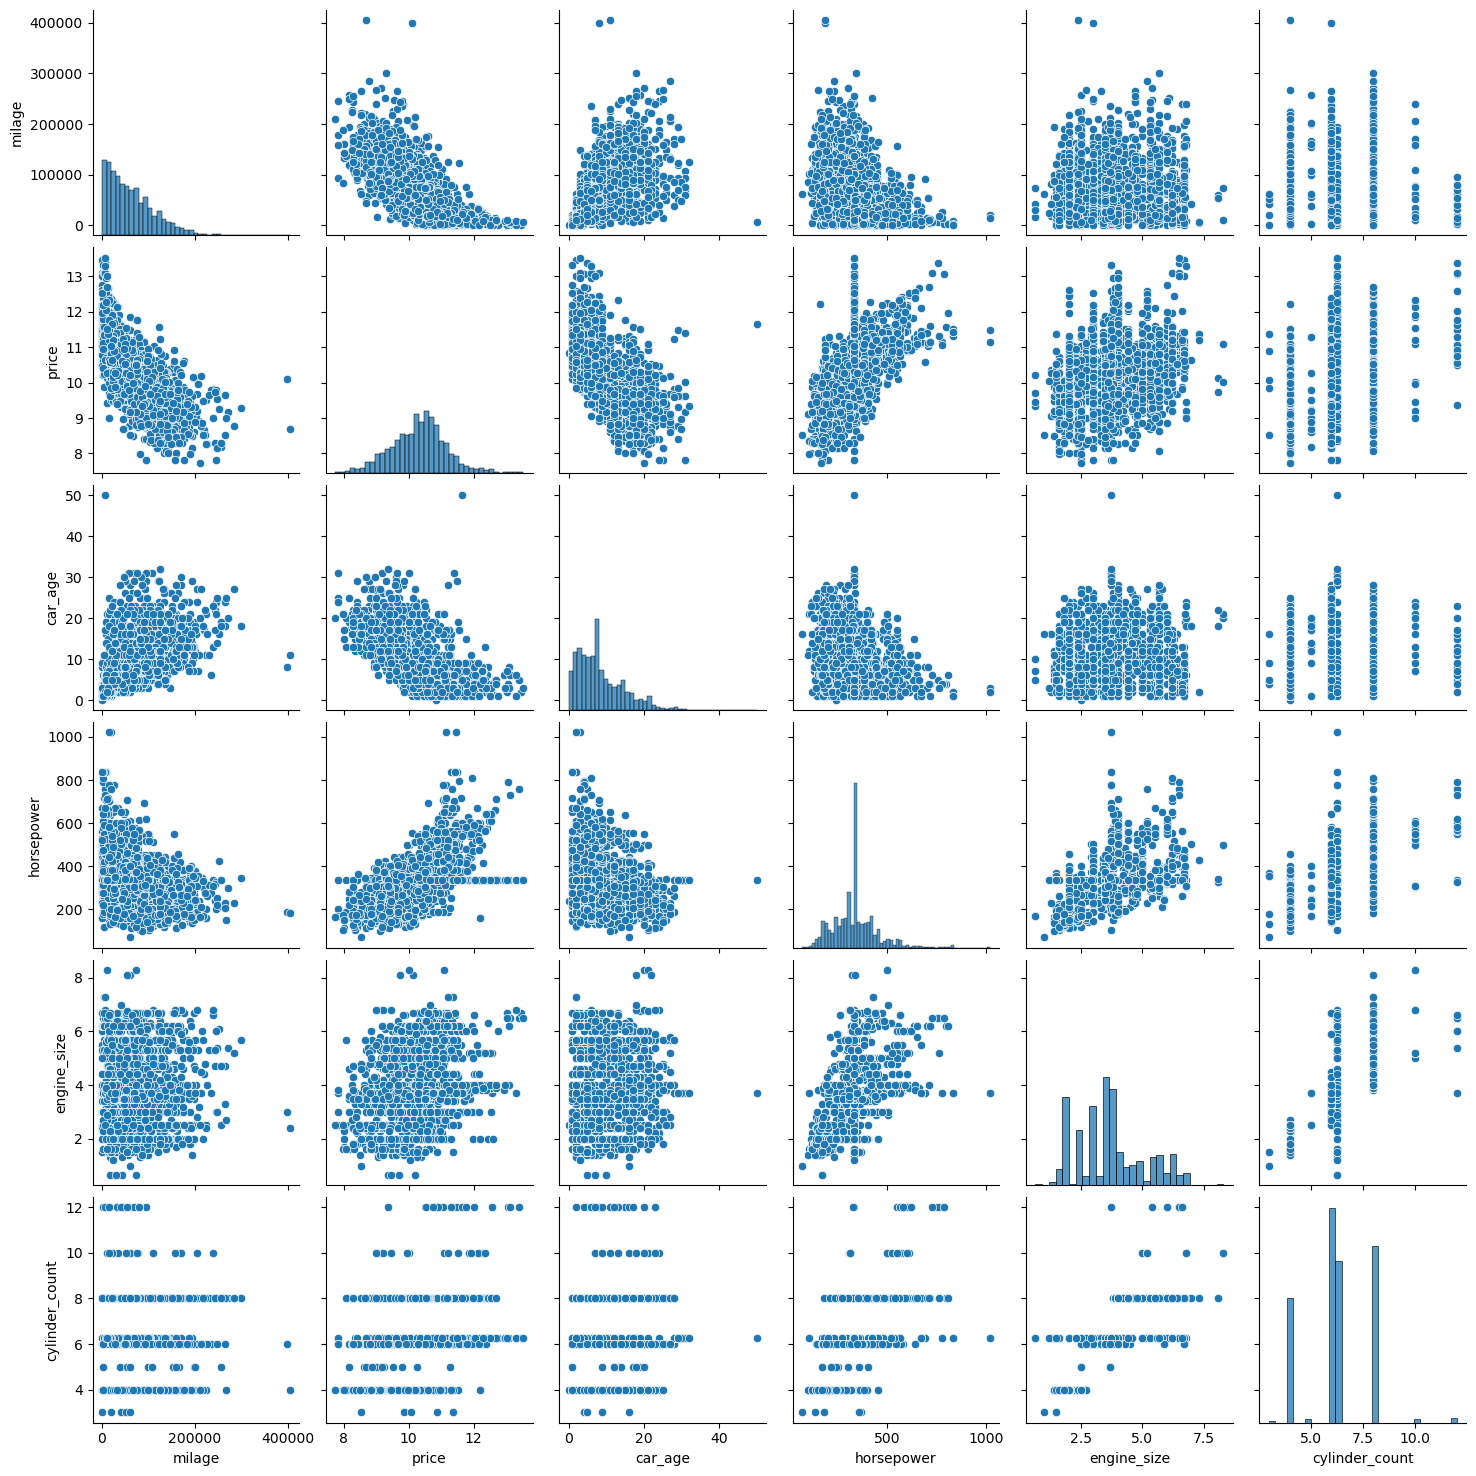

In [44]:
sns.pairplot(train_df)

## Correlation

In [47]:
train_df.corr(numeric_only=True)['price']

milage           -0.709994
price             1.000000
car_age          -0.638028
horsepower        0.592951
engine_size       0.259785
cylinder_count    0.271514
Name: price, dtype: float64

<Axes: >

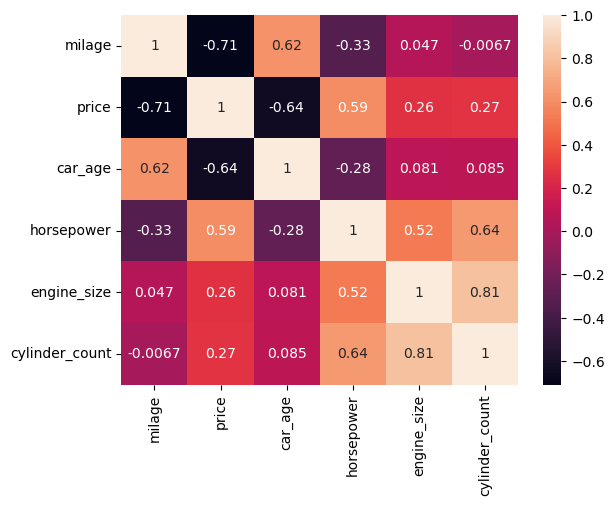

In [53]:
sns.heatmap(train_df.corr(numeric_only=True),annot=True)

## Scaling down the Data

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
scaler.fit(train_df[['milage','car_age','engine_size','horsepower','cylinder_count']])

StandardScaler()

In [58]:
train_df[['milage','car_age','engine_size','horsepower','cylinder_count']] = scaler.transform(train_df[['milage','car_age','engine_size','horsepower','cylinder_count']])

## Dealing With Categorical Columns

In [ ]:
#one custom transformer made in 'new_data_exploration' notebook check and make one here